# Supplementary Content & Exercise I

## I. Brief mathematical proof for XOR

### Under the definition of Perceptron: given step function as the activation function, we'll going to find proper weights and bias to form logical calculator such as XOR.

<img src="Perceptron.png" width=600 height=400 alt="Image">

<img src="Stepfunction.png" width=400 height=150 alt="Image">

### The proof is simple

|  (input1, input2)  | gold output |
|  ----  | ----  |
| (0, 0) | 0 |
| (0, 1) | 1 |
| (1, 0) | 1 |
| (1, 1) | 0 |

#### Assume weights = (w1, w2), bias = b, then we get four inequalities

$$w1 * 0 + w2 * 0 + b * 1 < 0$$
$$w1 * 0 + w2 * 1 + b * 1 > 0$$
$$w1 * 1 + w2 * 0 + b * 1 > 0$$
$$w1 * 1 + w2 * 1 + b * 1 < 0$$

#### From 2nd and 3rd

$$w1 + w2 + 2b > 0$$

#### From 1st and 4th

$$w1 + w2 + 2b < b < 0$$

### However, XOR can be solved if given activation function is replaced by others, e.g. Sigmoid, or: 

$$
\begin{equation}
f(x) = \begin{cases}
0, & \text{if } w * x + b \in (0.5, 1.5), \\
1, & \text{otherwise }
\end{cases}
\end{equation}
$$

<center>{w1 = 1.0, w2 = -1.0, b = 1.0} is a solution</center>

### Try: can you construct any activation function to formulate AND, OR, NOT and XOR all by 1-layer network?

## II. Construction of XOR by Perceptrons: reach nonlinearity by linearity

### Exercise: given the network structure, place AND, OR and NOT in A, B and C properly to form XOR

<img src="xor-quiz.png" alt="Image">

#### \*Not a neural network, so there's no weights on the edges

<img src="xor-answer.png" alt="Image">

|  (input1, input2)  | after A | after B | after C | after AND | gold output |
|  ----------------  | ------  | ------  | ------  | --------  | ----------  |
| (0, 0) | 0 | 0 | 1 | 0 | 0 |
| (0, 1) | 0 | 1 | 1 | 1 | 1 |
| (1, 0) | 0 | 1 | 1 | 1 | 1 |
| (1, 1) | 1 | 1 | 0 | 0 | 0 |

## III. Python code for AND calculator

<img src="Perceptron.png" width=600 height=400 alt="Image">

In [1]:
# Based on Udacity's codes: intro to deep learning with PyTorch

import pandas as pd

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [0, 0, 0, 1]
outputs = []

# Set weight1, weight2, and bias
weight1 = 1.0
weight2 = 1.0
bias = -1.5

# Generate and check output: how perceptron works
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    
    # Step function
    if linear_combination > 0:
        output = 1
    else:
        output = 0
        
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])
    
# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -1.5                    0          Yes
      0          1                  -0.5                    0          Yes
      1          0                  -0.5                    0          Yes
      1          1                   0.5                    1          Yes


### What about XOR?

In [2]:
# Based on Udacity's codes: intro to deep learning with PyTorch

import pandas as pd

# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [0, 1, 1, 0]
outputs = []

# Set weight1, weight2, and bias
weight1 = 1.0
weight2 = 1.0
bias = -1.5
"""
weight1 = 1.0
weight2 = -1.0
bias = 1.0
"""

# Generate and check output: how perceptron works
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    
    # Step function
    if linear_combination > 0:
        output = 1
    else:
        output = 0
    """
    if 0.5 < linear_combination < 1.5:
        output = 0
    else:
        output = 1
    """
        
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])
    
# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

You got 3 wrong.  Keep trying!

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -1.5                    0          Yes
      0          1                  -0.5                    0           No
      1          0                  -0.5                    0           No
      1          1                   0.5                    1           No


## IV. How to find bounday line (weights) automatically?

### What if thousands of cases?

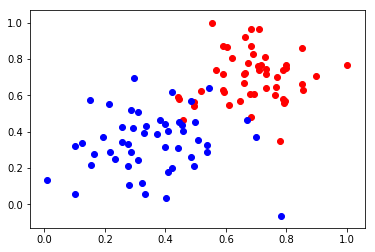

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv", header=None)
test_inputs = data.iloc[:, :2]
correct_outputs = data.iloc[:, -1]
plt.scatter(data[data.iloc[:, 2] == 0].iloc[:, 0], data[data.iloc[:, 2] == 0].iloc[:, 1], color="r")
plt.scatter(data[data.iloc[:, 2] == 1].iloc[:, 0], data[data.iloc[:, 2] == 1].iloc[:, 1], color="b")

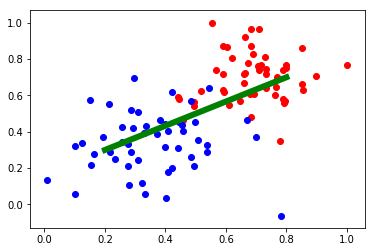

In [5]:
plt.scatter(data[data.iloc[:, 2] == 0].iloc[:, 0], data[data.iloc[:, 2] == 0].iloc[:, 1], color="r")
plt.scatter(data[data.iloc[:, 2] == 1].iloc[:, 0], data[data.iloc[:, 2] == 1].iloc[:, 1], color="b")
plt.plot([0.2, 0.8], [0.3, 0.7], color="g", linewidth=6)

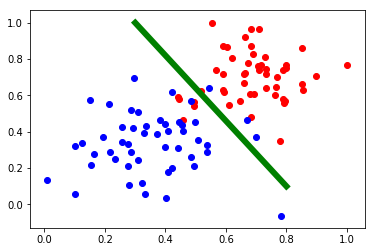

In [6]:
plt.scatter(data[data.iloc[:, 2] == 0].iloc[:, 0], data[data.iloc[:, 2] == 0].iloc[:, 1], color="r")
plt.scatter(data[data.iloc[:, 2] == 1].iloc[:, 0], data[data.iloc[:, 2] == 1].iloc[:, 1], color="b")
plt.plot([0.3, 0.8], [1.0, 0.1], color="g", linewidth=6)

#### Pseudocode for classification using single-layer perceptron

```
Input：T={(xi1, xi2, yi)}，i=1,2...N, learning rate=C, epoch=E
Output：w1, w2, b

(1) Start with random weights w1, w2 and b
(2) For every misclassified points (xi1, xi2):
        prediction = f(w1xi1 + w2xi2 + b)
        if prediction = 0:
            w1 = w1 + C * xi1
            w2 = w2 + C * xi2
            b = b + C
        if prediction = 1:
            w1 = w1 - C * xi1
            w2 = w2 - C * xi2
            b = b - C
(3) Go back to (2) until no misclassified points or reach E epoch
```

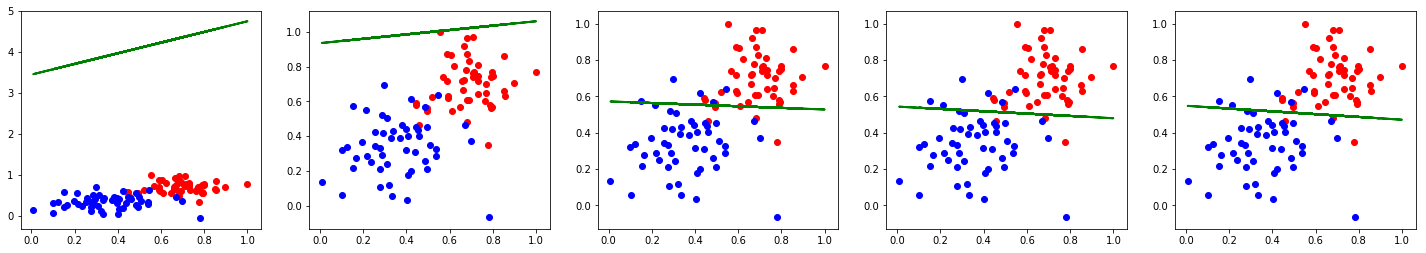

In [7]:
# Based on Udacity's codes: intro to deep learning with PyTorch
import numpy as np

# Setting the random seed, feel free to change it and see different solutions
np.random.seed(10)

# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate=0.01):
    for i in range(len(y)):
        linear_combination = (np.matmul(X[i], W) + b)[0]
        if linear_combination > 0:
            output = 1
        else:
            output = 0
        
        if output != y[i]:
            if output == 0:
                W[0] += X[i][0] * learn_rate
                W[1] += X[i][1] * learn_rate
                b += learn_rate
            elif output == 1:
                W[0] -= X[i][0] * learn_rate
                W[1] -= X[i][1] * learn_rate
                b -= learn_rate
    return W, b

    
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate=0.01, num_epochs=25):
    W = np.array(np.random.rand(2, 1))
    b = np.random.rand(1)[0] + max(X.T[0])
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0] / W[1], -b / W[1]))
    return boundary_lines

lines = trainPerceptronAlgorithm(np.array(test_inputs), np.array(correct_outputs))
fig = plt.figure(figsize=(25, 4))
for i, line in enumerate(lines[:5]):
    ax = fig.add_subplot(1, 5, i + 1)
    ax.scatter(data[data.iloc[:, 2] == 0].iloc[:, 0], data[data.iloc[:, 2] == 0].iloc[:, 1], color="r")
    ax.scatter(data[data.iloc[:, 2] == 1].iloc[:, 0], data[data.iloc[:, 2] == 1].iloc[:, 1], color="b")
    ax.plot(data.iloc[:, 0], line[1] + line[0] * data.iloc[:, 0], color="g", linewidth=2)

In [8]:
from IPython.display import HTML
HTML('<img src="line.gif">')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


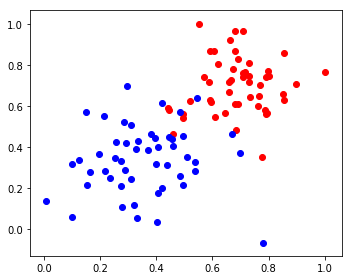

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(5, 4))
fig.set_tight_layout(True)

# Plot a scatter that persists (isn't redrawn) and the initial line
x_vals = data.iloc[:, 0]
ax.scatter(data[data.iloc[:, 2] == 0].iloc[:, 0], data[data.iloc[:, 2] == 0].iloc[:, 1], color="r")
ax.scatter(data[data.iloc[:, 2] == 1].iloc[:, 0], data[data.iloc[:, 2] == 1].iloc[:, 1], color="b")
line, = ax.plot(x_vals, x_vals, 'g-', linewidth=2)

def update(frame):
    y_vals = frame[1] + frame[0] * x_vals
    line.set_ydata(y_vals)
    return line, 

if __name__ == '__main__':
    # FuncAnimation will call the 'update' function for each frame; here
    # animating over 10 frames, with an interval of 200ms between frames.
    anim = FuncAnimation(fig, update, frames=lines, interval=200)
    anim.save('line.gif', dpi=80, writer='pillow')